In [241]:
#import libs
import pandas as pd
import matplotlib.pyplot as plt
import os

#all models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

#accuracy measures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

import numpy as np

In [242]:
#list of ODI teams with their ICC rank value
teams_dict = {'australia':15, 'india':18, 'bangladesh':20, 'srilanka':13, 'southafrica':16, 'pakistan':14, 
            'zimbabwe':9,'newzealand':17, 'westindies':12, 'england':19, 'afghanistan':11, 'ireland':10, 
            'netherlands':8,'oman':7, 'scotland':6, 'nepal':5, 'namibia':4, 'uae':3, 'usa':2, 'papuanewguinea':1
             }

#list of other t20 teams but this does not match the teams that we have in the dataset
teams_t20={'Pakistan': '1', 'Australia': '2', 'England': '3', 'India': '4', 'South Africa': '5', 'New Zealand': '6', 
           'Afghanistan': '7', 'Sri Lanka': '8', 'Bangladesh': '9', 'West Indies': '10', 'Zimbabwe': '11', 
           'Ireland': '12', 'Scotland': '13', 'UAE': '14', 'Nepal': '15', 'Netherlands': '16', 'PNG': '17', 
           'Oman': '18', 'Namibia': '19', 'Singapore': '20', 'Qatar': '21', 'Canada': '22', 'Hong Kong': '23', 
           'Jersey': '24', 'Saudi Arabia': '25', 'Italy': '26', 'Kuwait': '27', 'Kenya': '28', 'Denmark': '29', 
           'Bermuda': '30', 'Malaysia': '31', 'Germany': '32', 'USA': '33', 'Uganda': '34', 'Botswana': '35', 
           'Ghana': '36', 'Norway': '37', 'Austria': '38', 'Guernsey': '39', 'Romania': '40', 'Nigeria': '41', 
           'Sweden': '42', 'Spain': '43', 'Tanzania': '44', 'Cayman Islands': '45', 'Philippines': '46', 
           'Bahrain': '47', 'Argentina': '48', 'France': '49', 'Vanuatu': '50', 'Belize': '51', 'Luxembourg': '52', 
           'Malawi': '53', 'Peru': '54', 'Fiji': '55', 'Panama': '56', 'Belgium': '57', 'Samoa': '58', 'Japan': '59',
           'Costa Rica': '60', 'Mexico': '61', 'Hungary': '62', 'Bulgaria': '63', 'Czech Republic': '64', 
           'Israel': '65', 'Thailand': '66', 'Portugal': '67', 'Finland': '68', 'South Korea': '69', 
           'Isle of Man': '70', 'Chile': '71', 'Bhutan': '72', 'Mozambique': '73', 'Sierra Leone': '74', 
           'Brazil': '75', 'Maldives': '76', 'St Helena': '77', 'Malta': '78', 'Myanmar': '79', 
           'Indonesia': '80', 'China': '81', 'Gambia': '82', 'Gibraltar': '83', 'Swaziland': '84', 
           'Rwanda': '85', 'Lesotho': '86'}

In [243]:
#load all the rank files csv
path_for_rank_files = os.path.join(os.getcwd(), 'fantasy_game/dataset')

bbl = pd.read_csv(path_for_rank_files + '/bbl.csv')
bpl = pd.read_csv(path_for_rank_files + '/bpl.csv')
icc_women_odi = pd.read_csv(path_for_rank_files + '/icc-women-odi.csv')
icc_women_t20 = pd.read_csv(path_for_rank_files + '/icc-women-t20.csv')
ipl = pd.read_csv(path_for_rank_files + '/ipl.csv')
mzansi = pd.read_csv(path_for_rank_files + '/mzansi.csv')
psl = pd.read_csv(path_for_rank_files + '/psl.csv')
t10 = pd.read_csv(path_for_rank_files + '/t10-league.csv')

path_for_rank_files = '/Users/mustakimsunny/Desktop/ML/go11ai/data'

cpl = pd.read_csv(path_for_rank_files + '/carribean-premier-league.csv')
global_canada = pd.read_csv(path_for_rank_files + '/global-canada.csv') 
karnataka = pd.read_csv(path_for_rank_files + '/karnataka.csv')
oman_pent_t20 = pd.read_csv(path_for_rank_files + '/oman-pentagular-t20-series.csv')
syed_muali_trophy = pd.read_csv(path_for_rank_files + '/syed-mushtaq-ali-trophy.csv')
vbnd = pd.read_csv(path_for_rank_files + '/vitality-blast-nothern-division.csv')
vbsd = pd.read_csv(path_for_rank_files + '/vitality-blast-southern-division.csv')
womens_big_bash = pd.read_csv(path_for_rank_files + '/womens-big-bash.csv')
#covered_league = pd.read_csv(path_for_rank_files + '/covered_league.csv') 

In [244]:
#reverse the ranking to make meaningful score
def reverse_score(dataframe):
    score = [dataframe['Score'][ind] for ind in dataframe.index]
    score.reverse()
    dataframe['score_processed'] = score
    dataframe = dataframe.drop(['Score'], axis=1)
    return dataframe

#convert dataframe into dictionary
def convert_to_dict(dataframe):
    dic = {}
    for ind in dataframe.index:
        team, score = dataframe['Teams'][ind],dataframe['score_processed'][ind] 
        team = team.lower().replace(" ", '')
        dic[team] = score
    
    return dic


In [245]:
#convert to score in reverse order and then transform into dictionary
bbl = reverse_score(bbl)
bbl_dict = convert_to_dict(bbl)

bpl = reverse_score(bpl)
bpl_dict = convert_to_dict(bpl) 

icc_women_odi = reverse_score(icc_women_odi)
icc_women_odi_dict = convert_to_dict(icc_women_odi) 

icc_women_t20 = reverse_score(icc_women_t20)
icc_womend_t20_dict = convert_to_dict(icc_women_t20) 

ipl = reverse_score(ipl)
ipl_dict = convert_to_dict(ipl) 

mzansi = reverse_score(mzansi)
mzansi_dict = convert_to_dict(mzansi) 

psl = reverse_score(psl)
psl_dict = convert_to_dict(psl) 

t10 = reverse_score(t10)
t10_dict = convert_to_dict(t10) 




cpl = reverse_score(cpl)
cpl_dict = convert_to_dict(cpl) 


global_canada = reverse_score(global_canada)
global_canada_dict = convert_to_dict(global_canada)


karnataka = reverse_score(karnataka)
karnataka_dict = convert_to_dict(karnataka)

oman_pent_t20 = reverse_score(oman_pent_t20)
oman_pent_t20_dict = convert_to_dict(oman_pent_t20)


syed_muali_trophy = reverse_score(syed_muali_trophy)
syed_muali_trophy_dict = convert_to_dict(syed_muali_trophy)

vbnd = reverse_score(vbnd)
vbnd_dict = convert_to_dict(vbnd)


vbsd = reverse_score(vbsd)
vbsd_dict = convert_to_dict(vbsd)


womens_big_bash = reverse_score(womens_big_bash)
womens_big_bash_dict = convert_to_dict(womens_big_bash)

In [246]:
#this is how a rank_list looks like
syed_muali_trophy_dict

{'haryana': 10,
 'tamilnadu': 9,
 'karnataka': 8,
 'rajasthanroyals': 7,
 'maharashtra': 6,
 'baroda': 5,
 'mumbai': 4,
 'punjab': 3,
 'delhi': 2,
 'jharkhand': 1}

In [247]:
#set paths for dataset loading
#path = os.path.join(os.getcwd(), 'final_df.xlsx')
path = os.path.join(os.getcwd(), 'final_df_upgraded.xlsx')
#file_path = os.path.join(path, 'final_df.xlsx')
print(path)

/Users/mustakimsunny/Desktop/ML/final_df_upgraded.xlsx


In [248]:
#read files and see data types
final_data = pd.read_excel(path)

In [249]:
#preprocessing
#drop unnecessary columns, first argument = data, second argument = all the cols needed to be dropped

def drop_cols(dataframe,*arg):
    columns = list(arg)
    dataframe = dataframe.drop(columns, axis=1)
    return dataframe

#convert matchTime to datetime
def convert_to_datetime(dataframe, date_col):
    dataframe[date_col] = pd.to_datetime(dataframe[date_col])
    return dataframe


def add_gap_between_current_and_last_match(df_initial_model):
    #print(df_initial_model)
    df_initial_model = df_initial_model.sort_values(['matchTime'], ascending=[False])
    df_initial_model['prev'] = df_initial_model.matchTime.shift(-1)
    df_initial_model['diff'] = df_initial_model['matchTime'] - df_initial_model['prev']
    df_initial_model['diff'] = df_initial_model['diff'].dt.days
    df_initial_model = drop_cols(df_initial_model, 'prev')
    
    return df_initial_model

#seperating the hour from the match time and adding it into the dataframe
def extract_and_add_hour(dataframe,date_col):
    hour = list(dataframe[date_col].dt.hour)
    dataframe['hour'] = hour
    return dataframe

#add count of instances took place on the same date
def extract_and_add_date_count(dataframe, date_col):
    dataframe['date_only'] = dataframe[date_col].dt.to_period('D')
    dataframe['date_count'] = dataframe.date_only.map(dataframe.groupby('date_only').size())
    dataframe = drop_cols(dataframe, 'date_only')
    
    return dataframe
    

#match weight calculation
def match_weight(team1, team2, dictionary):
    if team1 in dictionary and team2 in dictionary:
        normalized_sum = dictionary[team1]/len(dictionary) + dictionary[team2]/len(dictionary)
        weight = normalized_sum/2
        return weight
    else:
        return None
    
#train test split
def split_train_test(dataframe, target):
    train_set, test_set = train_test_split(dataframe, test_size=0.2, random_state=42)
    X_train, X_test = train_set.drop(target, axis=1), test_set.drop(target, axis=1)
    y_train, y_test = train_set[target], test_set[target]
    
    return X_train, X_test, y_train, y_test

In [250]:
#creating a pipeline for scaling and normalization, this will be helpful for future scaling, we can just create these 
#pipelines which will consist of all different types of cleaning functions. In goes noisy data, out comes the cleanes processed data



#num_pipeline = Pipeline([
#        ('dc', drop_cols(dataframe,*arg)),
#    ])


In [251]:
#select model, fit and predict
#then measure different accuracy score for each of them

def fit_predict(X_train, X_test, y_train, y_test):
    predicted_vals = []
    algorithms = [LinearRegression(), SVC(), LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier(),
                  RandomForestRegressor(bootstrap=False, max_depth=40, max_features='sqrt',
                                        min_samples_leaf=1,min_samples_split=2,n_estimators=80),
                  RandomForestClassifier()]
    for algorithm in algorithms:
        model = algorithm
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        x_pred = model.predict(X_train)
        predicted_vals.append(y_pred)
        print('Model: ', model)
        print('\n')
        print('mean squared error: ', mean_squared_error(y_test, y_pred))
        print('explained variance score: ', explained_variance_score(y_test, y_pred))
        print('mean absolute error: ', mean_absolute_error(y_test, y_pred))
        print('median squared error: ', median_absolute_error(y_test, y_pred))
        print('r2 score on test: ', r2_score(y_test, y_pred))
        print('r2 score on train: ', r2_score(y_train, x_pred))

        print('---------------------------------------------')
    
    return predicted_vals
        


In [252]:
#copy main daaset to another variable for pre-processing
df_initial_model = final_data

In [253]:
#peek through the dataset
df_initial_model

,match_id,name,matchTime,total_contest_given,Total Entry Amount,TotalSeat,TotalWinningAMount,TotalTeamCapacity,ProfitMergin,TotalContestPerMatch,TotalWinner,WinningPercentage
0,8,New Zealand vs Bangladesh,2019-02-16 04:00:00,2,1080.0,54.0,2000.0,300.0,-920.0,1,8.0,0.1481
1,9,Islamabad United vs Multan Sultans,2019-02-16 17:30:00,2,600.0,30.0,550.0,300.0,50.0,1,5.0,0.1667
2,10,Lahore Qalandars vs Karachi Kings,2019-02-16 22:00:00,2,600.0,30.0,550.0,300.0,50.0,1,5.0,0.1667
3,14,Islamabad United vs Quetta Gladiators,2019-02-17 17:30:00,2,660.0,33.0,550.0,300.0,110.0,1,5.0,0.1515
4,15,Peshawar Zalmi vs Lahore Qalandars,2019-02-17 22:00:00,2,560.0,28.0,550.0,300.0,10.0,1,5.0,0.1786
...,...,...,...,...,...,...,...,...,...,...,...,...
745,1576,Multan Sultans vs Peshawar Zalmi,2020-03-17 15:00:00,8,18957.0,652.0,17980.0,676.0,977.0,7,234.0,0.3589
746,1577,Dolphins vs Knights,2020-03-17 17:30:00,7,9703.0,472.0,11590.0,565.0,-1887.0,6,206.0,0.4364
747,1578,Karachi Kings vs Lahore Qalandars,2020-03-17 20:00:00,9,19943.0,666.0,20680.0,756.0,-737.0,8,266.0,0.3994
748,1593,M&M Signs Strikers vs King Price Kings,2020-03-21 13:30:00,2,1670.0,167.0,1765.0,200.0,-95.0,1,45.0,0.2695


In [254]:
#drop columns that are not intended to be used for now
#df_initial_model = drop_cols(df_initial_model,'match_id','TotalContestPerMatch', 'Unnamed: 10')
df_initial_model = drop_cols(df_initial_model,'match_id','TotalContestPerMatch', 'TotalWinner', 'TotalSeat')

#convert match time column to datetime for further processing
df_initial_model = convert_to_datetime(df_initial_model,'matchTime')

#add difference between two matches in terms of days
df_initial_model = add_gap_between_current_and_last_match(df_initial_model)

#add date_count column
df_initial_model = extract_and_add_date_count(df_initial_model, 'matchTime')

#extract the hour values and as an additional column
df_initial_model = extract_and_add_hour(df_initial_model,'matchTime')

#now that the hour is in the dataframe, there is no need of the matchtime column, so drop it
df_initial_model = drop_cols(df_initial_model,'name', 'matchTime')

# fill missing values with mean column values
#df_initial_model.fillna(df_initial_model.mean(), inplace=True)
df_initial_model = df_initial_model.dropna()

Text(0, 0.5, 'Number of total contests given on average')

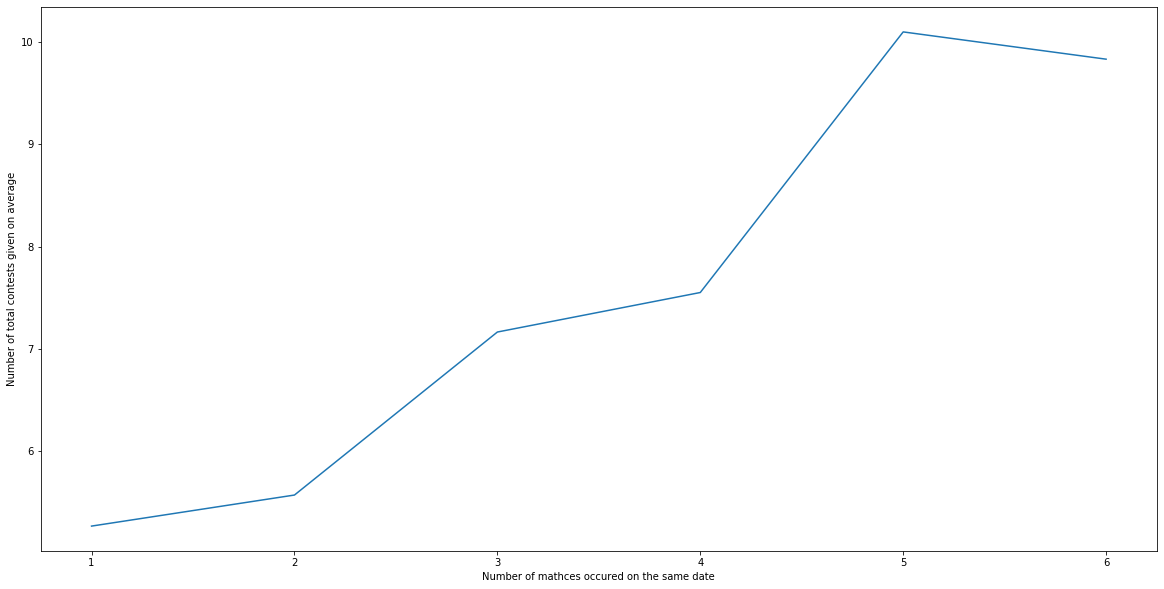

In [255]:
#average total contest VS number of matches on the same date plot
df_count = df_initial_model.groupby('date_count')
count_vs_contest = df_count['total_contest_given'].mean().reset_index()

plt.figure(figsize=(20,10))
plt.plot(count_vs_contest['date_count'], count_vs_contest['total_contest_given'])
plt.xlabel("Number of mathces occured on the same date")
plt.ylabel("Number of total contests given on average")

In [256]:
#peek thorugh this dataset
df_initial_model

,total_contest_given,Total Entry Amount,TotalWinningAMount,TotalTeamCapacity,ProfitMergin,WinningPercentage,diff,date_count,hour
749,2,1180.0,1765.0,200.0,-585.0,0.3814,0.0,2,17
748,2,1670.0,1765.0,200.0,-95.0,0.2695,3.0,2,13
747,9,19943.0,20680.0,756.0,-737.0,0.3994,0.0,3,20
746,7,9703.0,11590.0,565.0,-1887.0,0.4364,0.0,3,17
745,8,18957.0,17980.0,676.0,977.0,0.3589,1.0,3,15
...,...,...,...,...,...,...,...,...,...
5,2,2340.0,2000.0,300.0,340.0,0.0684,2.0,3,4
4,2,560.0,550.0,300.0,10.0,0.1786,0.0,2,22
3,2,660.0,550.0,300.0,110.0,0.1515,0.0,2,17
2,2,600.0,550.0,300.0,50.0,0.1667,0.0,3,22


In [257]:
#split into basic train, test 
X_train, X_test, y_train, y_test = split_train_test(df_initial_model, 'total_contest_given')

In [258]:
#scaling does not help since the values are already within a range

#from sklearn.preprocessing import MinMaxScaler
#X_train = MinMaxScaler().fit_transform(X_train.values)
#X_test = MinMaxScaler().fit_transform(X_test.values)

In [259]:
#convert target col to int
y_test = y_test.astype('int64')
y_train = y_train.astype('int64')

In [260]:
#check correlation 
corr_matrix = df_initial_model.corr()
print(corr_matrix['total_contest_given'].sort_values(ascending=False))

total_contest_given    1.000000
TotalWinningAMount     0.864686
Total Entry Amount     0.848363
ProfitMergin           0.491150
WinningPercentage      0.476053
date_count             0.332330
TotalTeamCapacity      0.087856
hour                  -0.109982
diff                  -0.181023
Name: total_contest_given, dtype: float64


In [261]:

predicted_vals = fit_predict(X_train, X_test, y_train, y_test)


Model:  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


mean squared error:  2.8473915648965775
explained variance score:  0.7414837131278642
mean absolute error:  1.253833985872178
median squared error:  1.0349783904081562
r2 score on test:  0.739530358422599
r2 score on train:  0.7584423064360041
---------------------------------------------
Model:  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


mean squared error:  3.315436241610738
explained variance score:  0.7157678742130072
mean absolute error:  1.1409395973154361
median squared error:  1.0
r2 score on test:  0.6967152322246761
r2 score on train:  0.7077806341803172
---------------------------------------------
Model:  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,

/Users/mustakimsunny/Desktop/ML/env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Model:  RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=40, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=80, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


mean squared error:  1.4256386325503354
explained variance score:  0.8720179952492007
mean absolute error:  0.7764261744966443
median squared error:  0.5
r2 score on test:  0.8695874539289894
r2 score on train:  1.0
---------------------------------------------
Model:  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
            

In [160]:
#looks like RandomForestRegressor giving the best answer, let's calculate with cross validation
from sklearn.model_selection import cross_val_score

rf_reg = RandomForestRegressor(bootstrap=False, max_depth=40, max_features='sqrt',
                                min_samples_leaf=1,min_samples_split=2,n_estimators=80)
cv_score = cross_val_score(rf_reg, X_train, y_train, scoring='r2', cv=10)

print(cv_score) 
print("Mean: ", cv_score.mean())

[0.80406931 0.85215884 0.78997718 0.90572474 0.91099297 0.89874547
 0.90343812 0.82848142 0.81452777 0.9050569 ]
Mean:  0.8613172717805156


In [161]:
#stratified sampling

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=10, random_state=42)
rf_reg = RandomForestRegressor(bootstrap=False, max_depth=40, max_features='sqrt',
                                        min_samples_leaf=1,min_samples_split=2,n_estimators=80)
r2 = []

for train_index, test_index in skfolds.split(X_train, y_train):
    #clone_clf = clone(sgd_clf)
    X_train_folds = X_train.iloc[train_index]
    y_train_folds = y_train.iloc[train_index]
    X_test_fold = X_train.iloc[test_index]
    y_test_fold = y_train.iloc[test_index]
    
    
    
    rf_reg.fit(X_train_folds, y_train_folds)
    y_pred = rf_reg.predict(X_test_fold)
    
    r2.append(r2_score(y_test_fold, y_pred))
    
print(sum(r2)/len(r2))

/Users/mustakimsunny/Desktop/ML/env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/Users/mustakimsunny/Desktop/ML/env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


0.8711242396018598


In [264]:
#build another dataset with hype values
hypes = []
dict_of_dicts = {'bbl_dict': bbl_dict,
     'bpl_dict': bpl_dict, 
     'icc_women_odi_dict': icc_women_odi_dict, 
     'icc_womend_t20_dict': icc_womend_t20_dict,
     'ipl_dict': ipl_dict,
     'mzansi_dict': mzansi_dict,
     'psl_dict': psl_dict,
     't10_dict': t10_dict,
     'teams_dict' : teams_dict,
     'cpl_dict':cpl_dict, 
     'global_canada_dict': global_canada_dict, 
     'karnataka_dict':karnataka_dict, 
     'oman_pent_t20_dict':oman_pent_t20_dict,
     'syed_muali_trophy_dict': syed_muali_trophy_dict, 
     'vbnd_dict':vbnd_dict,
     'vbsd_dict':vbsd_dict,
     'womens_big_bash_dict':womens_big_bash_dict}

i = 0
x = {}
teams_with_hype = pd.DataFrame()
for teams in final_data['name']:
    i += 1
    teams= teams.replace('vs', ',')
    teams = teams.replace(" ", '')
    team1,team2 = teams.lower().split(',')
    
    for key,val in dict_of_dicts.items():
        if team1 in dict_of_dicts[key] and team2 in dict_of_dicts[key]:
            #print(team1 + ' vs ' + team2 + ' found in ' + key)
            #print(match_weight(team1, team2,val))
            hype = match_weight(team1, team2,val)
            
            for key, val in final_data.iloc[i-1].items():
                x[key] = val
            x['hype'] = hype
            teams_with_hype = teams_with_hype.append(x, ignore_index=True)
            break

#datset to predict total contest
teams_with_hype_1 = teams_with_hype

#dataset to predict total seat
teams_with_hype_2 = teams_with_hype

In [265]:
#pre-processing for total contest prediction

#drop columns that are not intended to be used for now
#teams_with_hype = drop_cols(teams_with_hype,'match_id','TotalContestPerMatch', 'Unnamed: 10')
#teams_with_hype = drop_cols(teams_with_hype,'match_id','TotalContestPerMatch', 'TotalWinner')
teams_with_hype_1 = drop_cols(teams_with_hype_1,'match_id','TotalContestPerMatch', 'TotalWinner', 'TotalSeat')


#convert match time column to datetime for further processing
teams_with_hype_1 = convert_to_datetime(teams_with_hype_1,'matchTime')

#add difference between two matches in terms of days
teams_with_hype_1 = add_gap_between_current_and_last_match(teams_with_hype_1)

#add number of matches occured at the same date
teams_with_hype_1 = extract_and_add_date_count(teams_with_hype_1, 'matchTime')

#extract the hour values and as an additional column
teams_with_hype_1 = extract_and_add_hour(teams_with_hype_1,'matchTime')

#now that the hour is in the dataframe, there is no need of the matchtime column, so drop it
teams_with_hype_1 = drop_cols(teams_with_hype_1,'name', 'matchTime')

# fill missing values with mean column values
teams_with_hype_1.fillna(teams_with_hype_1.mean(), inplace=True)
#teams_with_hype = teams_with_hype.dropna()

In [266]:
teams_with_hype_1

,ProfitMergin,Total Entry Amount,TotalTeamCapacity,TotalWinningAMount,WinningPercentage,hype,total_contest_given,diff,date_count,hour
549,-5485.0,2030.0,550.0,7515.0,1.0294,0.850000,3.0,0.000000,2,14
548,-5023.0,10872.0,795.0,15895.0,0.4306,0.800000,8.0,1.000000,2,5
547,4160.0,31075.0,995.0,26915.0,0.3136,0.800000,8.0,0.000000,1,9
546,3935.0,31885.0,1100.0,27950.0,0.3336,0.850000,9.0,1.000000,1,18
545,3812.0,30772.0,996.0,26960.0,0.3143,0.725000,8.0,2.000000,1,18
...,...,...,...,...,...,...,...,...,...,...
4,-175.0,825.0,300.0,1000.0,0.0909,0.775000,2.0,2.000000,1,21
3,230.0,1230.0,300.0,1000.0,0.0610,0.775000,2.0,0.000000,2,21
2,340.0,2340.0,300.0,2000.0,0.0684,0.925000,2.0,2.000000,2,4
1,110.0,660.0,300.0,550.0,0.1515,0.583333,2.0,1.000000,1,17


In [267]:
#split into basic train, test 
X_train, X_test, y_train, y_test = split_train_test(teams_with_hype_1, 'total_contest_given')
#X_train, X_test, y_train, y_test = split_train_test(teams_with_hype, 'TotalSeat')

#convert target col to int
y_test = y_test.astype('int64')
y_train = y_train.astype('int64')


In [268]:
predicted_vals = fit_predict(X_train, X_test, y_train, y_test)


Model:  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


mean squared error:  2.4126466645859477
explained variance score:  0.8204088378352765
mean absolute error:  1.1520872445579116
median squared error:  0.8894591876826201
r2 score on test:  0.8178339550050651
r2 score on train:  0.7451911474675157
---------------------------------------------
Model:  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


mean squared error:  3.081081081081081
explained variance score:  0.7685651603730803
mean absolute error:  1.135135135135135
median squared error:  1.0
r2 score on test:  0.7673640475052395
r2 score on train:  0.6788122574893158
---------------------------------------------
Model:  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True

/Users/mustakimsunny/Desktop/ML/env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Model:  RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=40, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=80, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


mean squared error:  1.5888147522522527
explained variance score:  0.8800777295443124
mean absolute error:  0.7626126126126125
median squared error:  0.4375
r2 score on test:  0.8800370962330404
r2 score on train:  1.0
---------------------------------------------
Model:  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
         

In [269]:
#looks like RandomForestRegressor giving the best answer, let's calculate with cross validation
from sklearn.model_selection import cross_val_score

rf_reg = RandomForestRegressor(bootstrap=False, max_depth=40, max_features='sqrt',
                                        min_samples_leaf=1,min_samples_split=2,n_estimators=80)
cv_score = cross_val_score(rf_reg, X_train, y_train, scoring='r2', cv=10)

print(cv_score) 
print("Mean: ", cv_score.mean())

[0.82962398 0.90201075 0.77044691 0.93400937 0.84789605 0.8210699
 0.91647044 0.84674771 0.86247171 0.85469039]
Mean:  0.8585437214306266


In [270]:
#stratified sampling

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=10, random_state=42)
rf_reg = RandomForestRegressor(bootstrap=False, max_depth=40, max_features='sqrt',
                                        min_samples_leaf=1,min_samples_split=2,n_estimators=80)
r2 = []

for train_index, test_index in skfolds.split(X_train, y_train):
    #clone_clf = clone(sgd_clf)
    X_train_folds = X_train.iloc[train_index]
    y_train_folds = y_train.iloc[train_index]
    X_test_fold = X_train.iloc[test_index]
    y_test_fold = y_train.iloc[test_index]
    
    
    
    rf_reg.fit(X_train_folds, y_train_folds)
    y_pred = rf_reg.predict(X_test_fold)
    
    r2.append(r2_score(y_test_fold, y_pred))
    
print(sum(r2)/len(r2))

/Users/mustakimsunny/Desktop/ML/env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/Users/mustakimsunny/Desktop/ML/env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


0.8666232707299366


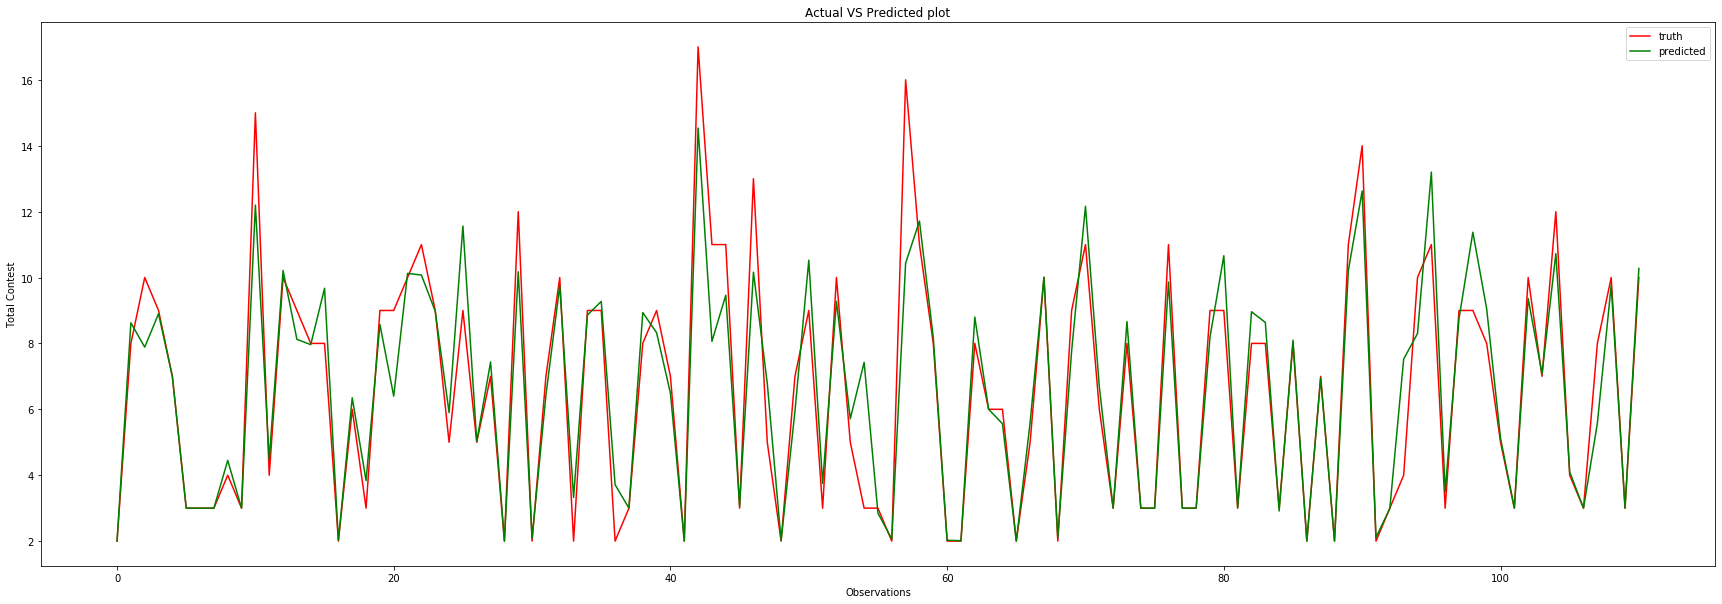

In [271]:
#plot actual VS predicted value for any model from the list in the cell above
x = []
for i in range(111):
    x.append(i)
y1 = y_test
y2 = predicted_vals[5] #change the index of the predicted_vals according to what model needs to be visualized

plt.figure(figsize=(30,10))
plt.plot(x, y1, label = "truth", color='red')
plt.plot(x, y2, label = "predicted", color='green')

plt.xlabel('Observations')
plt.ylabel('Total Contest')
plt.title('Actual VS Predicted plot')
plt.legend()

plt.show()

In [272]:
#another copy of the dataset used to predict number of seats

#drop columns that are not intended to be used for now
#teams_with_hype = drop_cols(teams_with_hype,'match_id','TotalContestPerMatch', 'Unnamed: 10')
#teams_with_hype = drop_cols(teams_with_hype,'match_id','TotalContestPerMatch', 'TotalWinner')
teams_with_hype_2 = drop_cols(teams_with_hype_2,'match_id','TotalContestPerMatch', 'TotalWinner')


#convert match time column to datetime for further processing
teams_with_hype_2 = convert_to_datetime(teams_with_hype_2,'matchTime')

#add difference between two matches in terms of days
teams_with_hype_2 = add_gap_between_current_and_last_match(teams_with_hype_2)

#add number of matches occured at the same date
teams_with_hype_2 = extract_and_add_date_count(teams_with_hype_2, 'matchTime')

#extract the hour values and as an additional column
teams_with_hype_2 = extract_and_add_hour(teams_with_hype_2,'matchTime')

#now that the hour is in the dataframe, there is no need of the matchtime column, so drop it
teams_with_hype_2 = drop_cols(teams_with_hype_2,'name', 'matchTime')

# fill missing values with mean column values
teams_with_hype_2.fillna(teams_with_hype_2.mean(), inplace=True)
#teams_with_hype = teams_with_hype.dropna()

In [273]:
teams_with_hype_2

,ProfitMergin,Total Entry Amount,TotalSeat,TotalTeamCapacity,TotalWinningAMount,WinningPercentage,hype,total_contest_given,diff,date_count,hour
549,-5485.0,2030.0,136.0,550.0,7515.0,1.0294,0.850000,3.0,0.000000,2,14
548,-5023.0,10872.0,562.0,795.0,15895.0,0.4306,0.800000,8.0,1.000000,2,5
547,4160.0,31075.0,995.0,995.0,26915.0,0.3136,0.800000,8.0,0.000000,1,9
546,3935.0,31885.0,1100.0,1100.0,27950.0,0.3336,0.850000,9.0,1.000000,1,18
545,3812.0,30772.0,996.0,996.0,26960.0,0.3143,0.725000,8.0,2.000000,1,18
...,...,...,...,...,...,...,...,...,...,...,...
4,-175.0,825.0,55.0,300.0,1000.0,0.0909,0.775000,2.0,2.000000,1,21
3,230.0,1230.0,82.0,300.0,1000.0,0.0610,0.775000,2.0,0.000000,2,21
2,340.0,2340.0,117.0,300.0,2000.0,0.0684,0.925000,2.0,2.000000,2,4
1,110.0,660.0,33.0,300.0,550.0,0.1515,0.583333,2.0,1.000000,1,17


In [274]:
#split into basic train, test 
X_train, X_test, y_train, y_test = split_train_test(teams_with_hype_2, 'TotalSeat')
#X_train, X_test, y_train, y_test = split_train_test(teams_with_hype, 'TotalSeat')

#convert target col to int
y_test = y_test.astype('int64')
y_train = y_train.astype('int64')

In [275]:
predicted_vals = fit_predict(X_train, X_test, y_train, y_test)

Model:  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


mean squared error:  31283.124275646387
explained variance score:  0.9101179127660688
mean absolute error:  116.30256223281191
median squared error:  67.23141029513454
r2 score on test:  0.9097415984034476
r2 score on train:  0.9175225900455679
---------------------------------------------
Model:  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


mean squared error:  72097.58558558559
explained variance score:  0.8029326678949125
mean absolute error:  147.4954954954955
median squared error:  97.0
r2 score on test:  0.7919832822135494
r2 score on train:  0.7093171126062481
---------------------------------------------


/Users/mustakimsunny/Desktop/ML/env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Model:  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


mean squared error:  384292.46846846846
explained variance score:  0.02443655679817225
mean absolute error:  394.55855855855856
median squared error:  269.0
r2 score on test:  -0.10876470150265405
r2 score on train:  -0.17562169609074685
---------------------------------------------
Model:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


mean squared error:  105158.55855855856
explained variance score:  0.7553055156687791
mean absolute error:  158.3063063063063
median squared error:  74.0
r2 score on test:  0.69659541

In [276]:
#looks like RandomForestRegressor giving the best answer, let's calculate with cross validation
from sklearn.model_selection import cross_val_score

rf_reg = RandomForestRegressor(bootstrap=False, max_depth=40, max_features='sqrt',
                                        min_samples_leaf=1,min_samples_split=2,n_estimators=80)
cv_score = cross_val_score(rf_reg, X_train, y_train, scoring='r2', cv=10)

print(cv_score) 
print("Mean: ", cv_score.mean())

[0.98560845 0.97975752 0.97843063 0.94479162 0.97686481 0.98449676
 0.95860125 0.971615   0.97306937 0.96451042]
Mean:  0.9717745821011


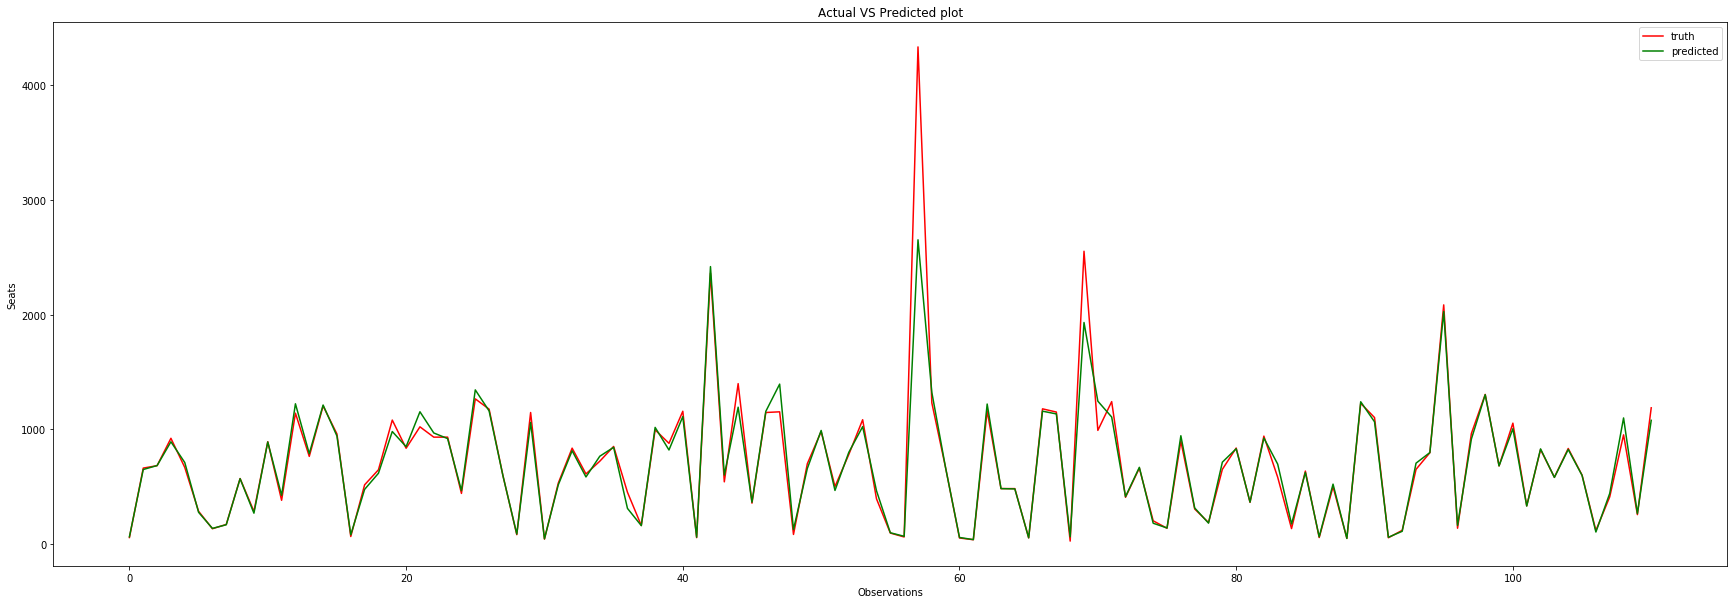

In [277]:
#plot actual VS predicted value for any model from the list in the cell above
x = []
for i in range(111):
    x.append(i)
y1 = y_test
y2 = predicted_vals[5] #change the index of the predicted_vals according to what model needs to be visualized

plt.figure(figsize=(30,10))
plt.plot(x, y1, label = "truth", color='red')
plt.plot(x, y2, label = "predicted", color='green')

plt.xlabel('Observations')
plt.ylabel('Seats')
plt.title('Actual VS Predicted plot')
plt.legend()

plt.show()

In [ ]:
#Grid search to find the best parameter, be careful about this block of code
#running in local machine may take forever


# Number of trees in random forest
#n_estimators = [i for i in range(50,150,10)]
# Number of features to consider at every split
#max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)
# Minimum number of samples required to split a node
#min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
#min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
#bootstrap = [True, False]


#from sklearn.model_selection import GridSearchCV
#from sklearn.datasets import make_classification

#RandomForestRegressor()
# Build a classification task using 3 informative features





#rfc = RandomForestRegressor() 

#param_grid = { 
#    'n_estimators': n_estimators,
#    'max_features': max_features,
#    'max_depth': max_depth,
#    'min_samples_split': min_samples_split,
#    'min_samples_leaf': min_samples_leaf,
#    'bootstrap': bootstrap
    
#}

#CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
#CV_rfc.fit(X_train, y_train)
#print(CV_rfc.best_params_) 

In [ ]:
#next steps
#1. pickle model to save
#2. create a pipeline to predict values in real time
#3. integretion with the app admin section